In [343]:
# import plt
import matplotlib.pyplot as plt

# Load csv

In [344]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sta_cini_lose_predavanje.csv')

In [345]:
df.head()

,Timestamp,Тип студијског програма:,Смер:,Дужина студирања на тренутном програму:,Просечна оцена током студирања:,Колико често присуствујете предавањима?,Лоша припрема професора,Читање са слајдова без додатног објашњавања,Превише стручних термина,Монотон начин предавања,...,Сматрам да је предавање лоше уколико није прилагођено реалним потребама у пракси.,Сматрам да је предавање лоше уколико се одржава у простору који је неадекватан.,Сматрам да је предавање лоше ако професор нема способност да задржи концентрацију студената током предавања.,Сматрам да је предавање лоше уколико се студенти осећају нелагодно да поставе питање.,Сматрам да је предавање лоше уколико је незанимљиво и не мотивише студента да им редовно присуствује.,Како Ви дефинишете лоше предавање?,Да ли сте присуствовали неком предавању на Математичком факултету које бисте оценили као лоше?,"Ако је у претходном питању одговор „Да”, шта је највише допринело томе?",Да ли сматрате да професори на Математичком факултету довољно раде на унапређењу квалитета предавања?,Којим предавањима сте били најмање задовољни и зашто?
0,11/17/2024 12:28:49,Мастер студије,Информатика,1 година,не желим да се изјасним,Ретко присуствујем (мање од 50%),5,5,5,5,...,4,3,3,4,4,NaN,Да,NaN,Не,Miticem
1,11/17/2024 12:29:44,Мастер студије,Информатика,1 година,8.01 - 9.00,Уопште не присуствујем,3,5,3,4,...,4,4,2,3,2,Samo citanje sa slajdova,Да,Staticnost,Нисам сигуран/а,Baze podataka
2,11/17/2024 12:30:29,Основне студије,Информатика,више од 4 године,7.01 - 8.00,Често присуствујем (50-75%),3,5,4,4,...,4,2,4,4,4,Predavanje kod profesora Miroslava Marica (u o...,Да,Nisam se osecao kao da sam ista korisno naucio...,Нисам сигуран/а,Pomenuta oredavanja kod MM iz OSa
3,11/17/2024 12:30:56,Мастер студије,Информатика,1 година,не желим да се изјасним,Често присуствујем (50-75%),5,5,4,5,...,5,5,5,5,5,NaN,Да,Monotono predavanje,Нисам сигуран/а,"Istrazivanje podataka, profesor se ne cuje dok..."
4,11/17/2024 12:35:28,Мастер студије,Информатика,1 година,8.01 - 9.00,Ретко присуствујем (мање од 50%),4,5,2,4,...,1,2,3,3,4,NaN,Да,"Monotonost predavanja, profesor samo cita sa s...",Нисам сигуран/а,Linearna algebra i analiticka geometrija. Prof...


## Number of NaN

In [346]:
nan_counts = df.isna().sum()
print(nan_counts)

Timestamp                                                                                                                    0
Тип студијског програма:                                                                                                     0
Смер:                                                                                                                        0
Дужина студирања на тренутном програму:                                                                                      0
Просечна оцена током студирања:                                                                                              0
Колико често присуствујете предавањима?                                                                                      0
Лоша припрема професора                                                                                                      0
Читање са слајдова без додатног објашњавања                                                                    

In [347]:
# Mapping of Serbian Cyrillic to Latin (lowercase, no accents)
cyrillic_to_latin = {
    'А': 'a', 'а': 'a', 'Б': 'b', 'б': 'b', 'В': 'v', 'в': 'v',
    'Г': 'g', 'г': 'g', 'Д': 'd', 'д': 'd', 'Ђ': 'dj', 'ђ': 'dj',
    'Е': 'e', 'е': 'e', 'Ж': 'z', 'ж': 'z', 'З': 'z', 'з': 'z',
    'И': 'i', 'и': 'i', 'Ј': 'j', 'ј': 'j', 'К': 'k', 'к': 'k',
    'Л': 'l', 'л': 'l', 'Љ': 'lj', 'љ': 'lj', 'М': 'm', 'м': 'm',
    'Н': 'n', 'н': 'n', 'Њ': 'nj', 'њ': 'nj', 'О': 'o', 'о': 'o',
    'П': 'p', 'п': 'p', 'Р': 'r', 'р': 'r', 'С': 's', 'с': 's',
    'Т': 't', 'т': 't', 'Ћ': 'c', 'ћ': 'c', 'У': 'u', 'у': 'u',
    'Ф': 'f', 'ф': 'f', 'Х': 'h', 'х': 'h', 'Ц': 'c', 'ц': 'c',
    'Ч': 'c', 'ч': 'c', 'Џ': 'dz', 'џ': 'dz', 'Ш': 's', 'ш': 's',
    ' ': '_'
}

def cyrillic_to_latin_conversion(text):
    """
    Converts Serbian Cyrillic text to lowercase Latin without accents and replaces spaces with underscores.
    """
    converted_text = ''.join(cyrillic_to_latin.get(char, char) for char in text).lower()
    return converted_text

# Pie plots

In [348]:
import unidecode

def plot_pie(column, remove_last_chars=1):
    df[column].value_counts().plot.pie()
    plt.title(column)  # Removes the colon from the column name
    plt.ylabel('')  # Removes the 'count' label
    # convert column[:-1] from serbian cyrilics to latin without accents
    column_latin = cyrillic_to_latin_conversion(column[:-remove_last_chars])

    plt.savefig('plot/pie_' + column_latin + '.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

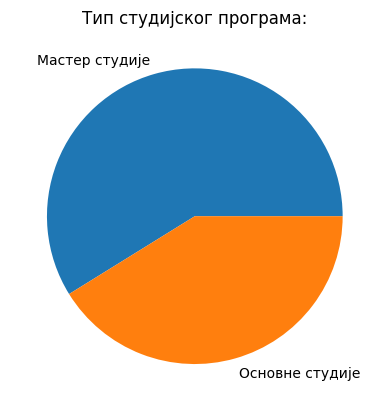

In [349]:
plot_pie('Тип студијског програма:')

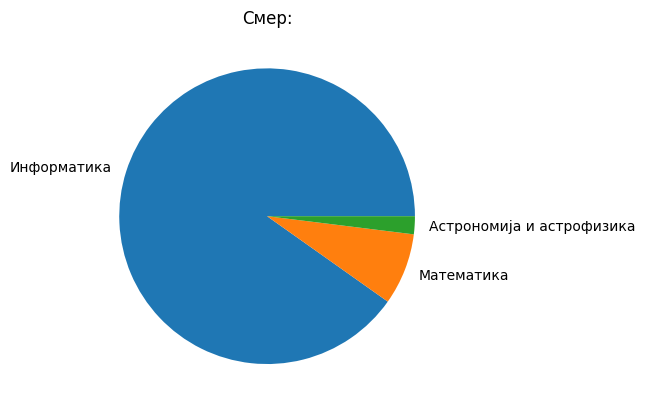

In [350]:
plot_pie('Смер:')

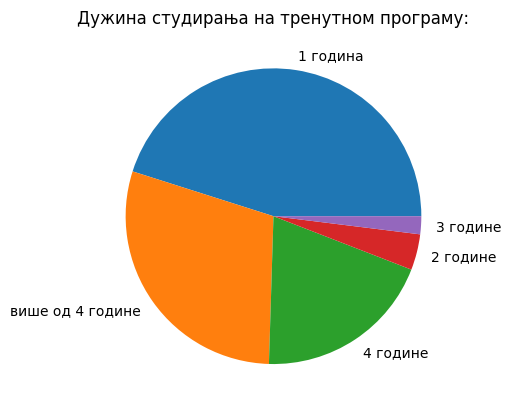

In [351]:
plot_pie('Дужина студирања на тренутном програму:')

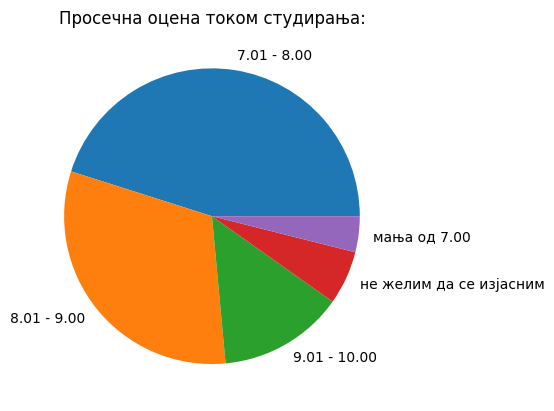

In [352]:
plot_pie('Просечна оцена током студирања:')

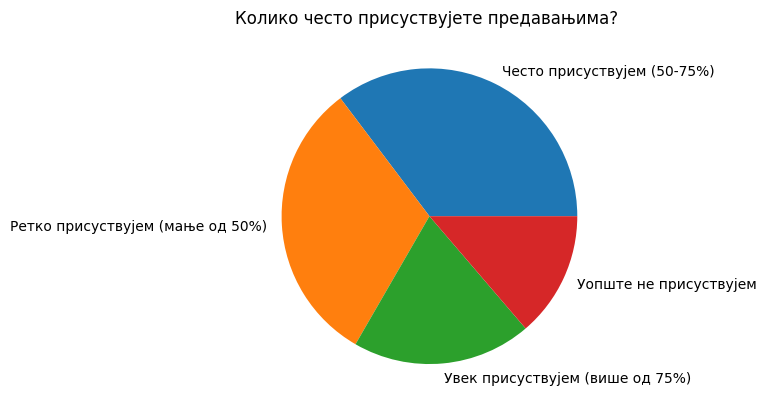

In [353]:
plot_pie('Колико често присуствујете предавањима? ', 2)

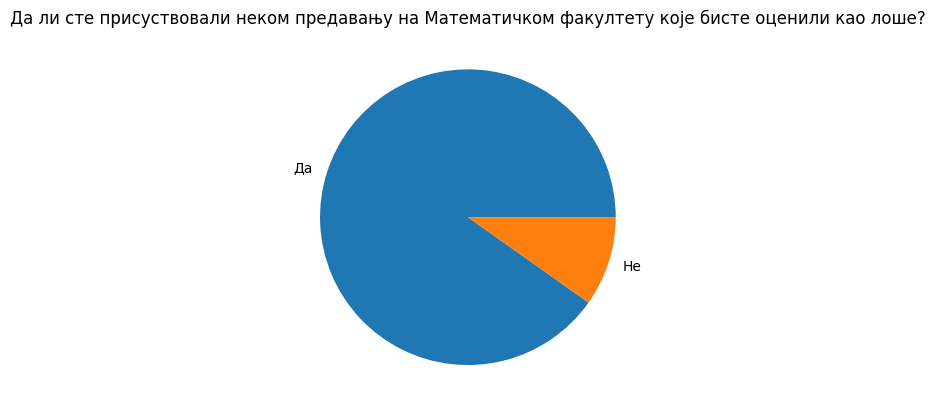

In [354]:
column = 'Да ли сте присуствовали неком предавању на Математичком факултету које бисте оценили као лоше?'
plot_pie(column)

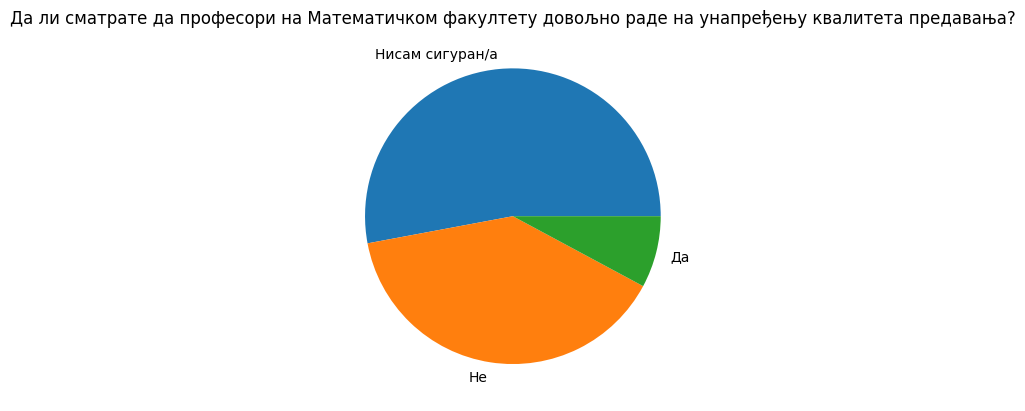

In [355]:
column = 'Да ли сматрате да професори на Математичком факултету довољно раде на унапређењу квалитета предавања?'
plot_pie(column)

# Numeric results

In [356]:
def plot_bar(column):
    df[column].value_counts().sort_index().plot.bar()

    # set the title of the plot
    plt.title(column, fontsize=10)

    # calculate the percentage of each value
    total = df[column].count()
    for i, value in enumerate(df[column].value_counts().sort_index()):
        plt.text(i, value + 1, f'{value / total * 100:.2f}%', ha='center')

    # extend the y-axis to make space for the percentage labels
    plt.ylim(0, df[column].value_counts().max() + 17)

    # Calculate mean and median
    mean = df[column].mean()
    median = df[column].median()
    std = df[column].std()

    # Add vertical lines for the mean and median
    plt.axvline(mean - 1, color='blue', linestyle='', label=f'Средња вредност: {mean:.2f}')
    plt.axvline(median - 1, color='red', linestyle='', label=f'Медијана: {median:.2f}')
    plt.axvline(std, color='red', linestyle='', label=f'Девијација: {std:.2f}')

    # dont show x axis label
    plt.xlabel('')

    # Add a legend to explain the vertical lines
    plt.legend()
    
    plt.savefig('plot/' + cyrillic_to_latin_conversion(column) + "png", dpi=300, bbox_inches='tight')
    plt.show()

def kde_plot(column):
    distribution = df[column]
    import seaborn as sns
    sns.kdeplot(distribution, fill=True, color='blue')
    plt.title('Kernel Density Estimate')
    plt.suptitle(column)
    plt.xlabel('Rating')

    
    plt.savefig("plot/kde_" + cyrillic_to_latin_conversion(column) + "png", dpi=300, bbox_inches='tight')
    plt.show()



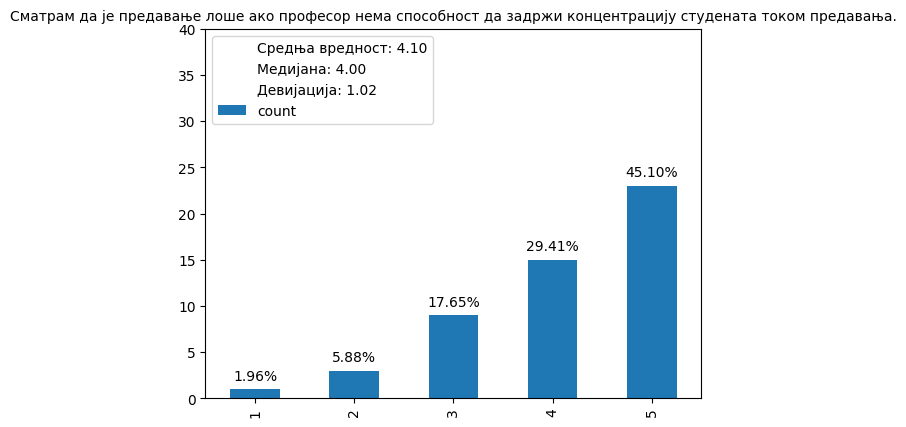

In [357]:
plot_bar('Сматрам да је предавање лоше ако професор нема способност да задржи концентрацију студената током предавања.')

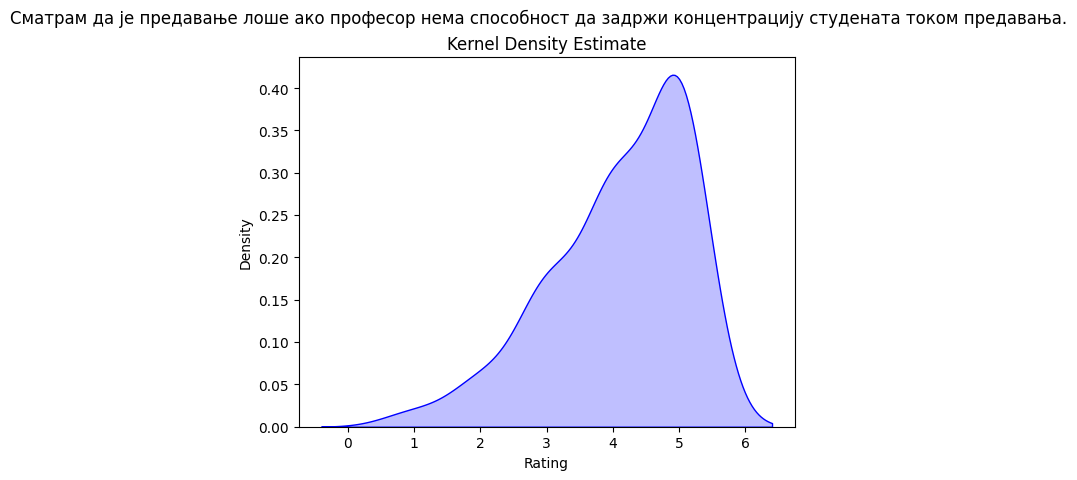

In [358]:
kde_plot('Сматрам да је предавање лоше ако професор нема способност да задржи концентрацију студената током предавања.')

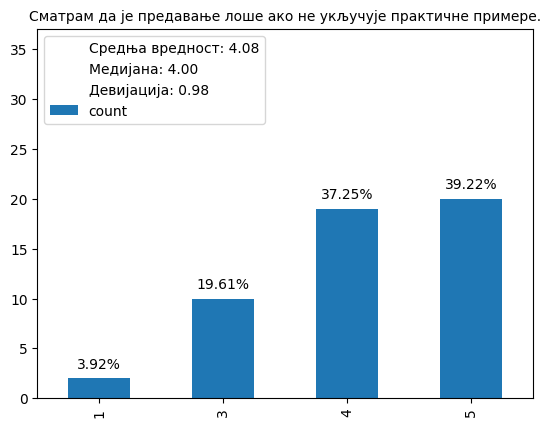

In [359]:
plot_bar('Сматрам да је предавање лоше ако не укључује практичне примере.')

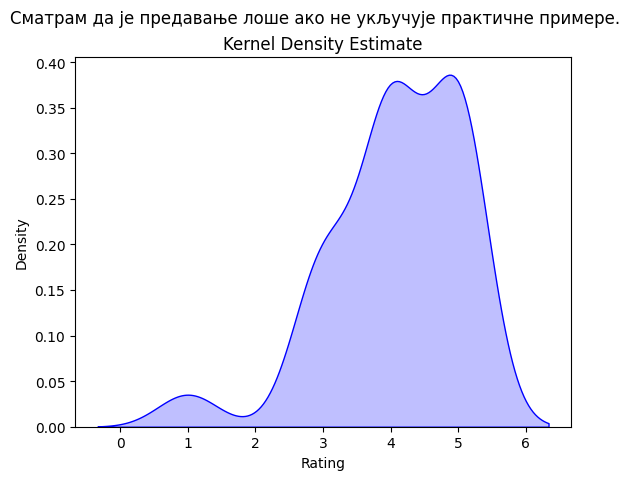

In [360]:
kde_plot('Сматрам да је предавање лоше ако не укључује практичне примере.')

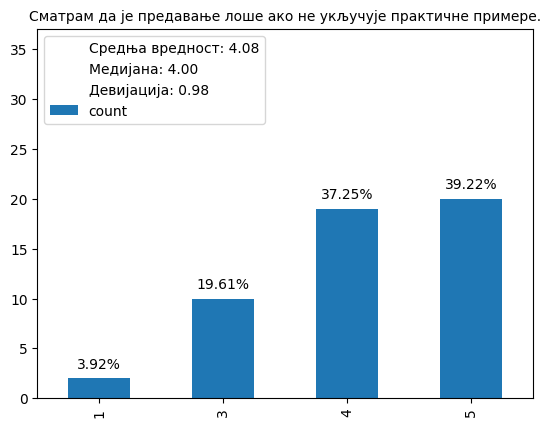

In [361]:
plot_bar('Сматрам да је предавање лоше ако не укључује практичне примере.')

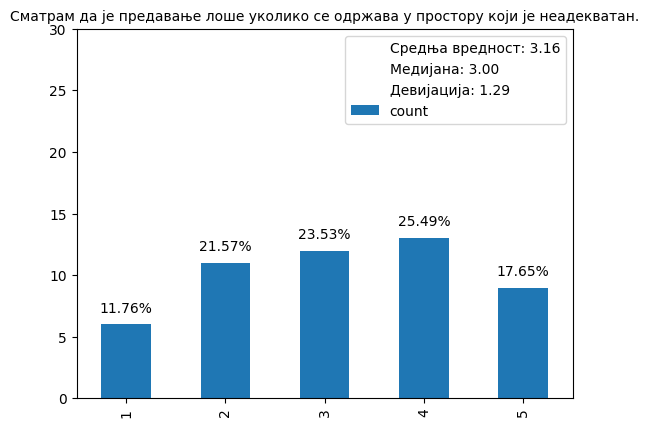

In [362]:
plot_bar('Сматрам да је предавање лоше уколико се одржава у простору који је неадекватан.')

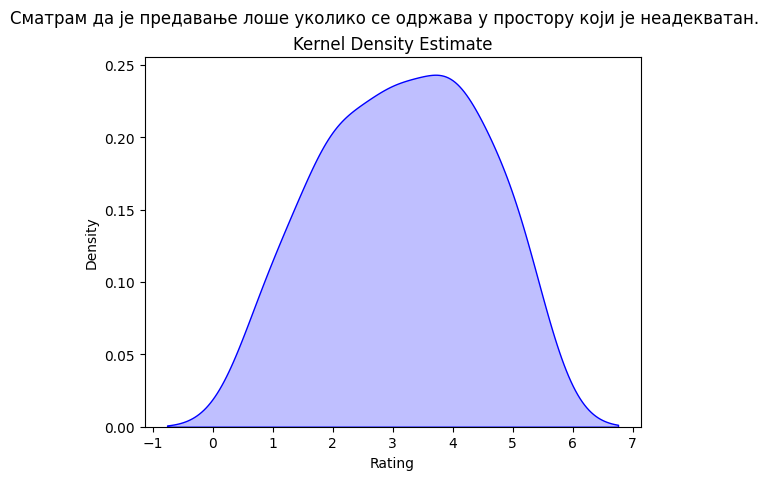

In [363]:
kde_plot('Сматрам да је предавање лоше уколико се одржава у простору који је неадекватан.')
